✅ Dataset loaded successfully!
Shape: (19084, 13)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,engagement
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,19667.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,98234.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,101710.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,276584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,39796.0


/Users/varvarakusaeva/Documents/BIT/big data/tiktok_trend_analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


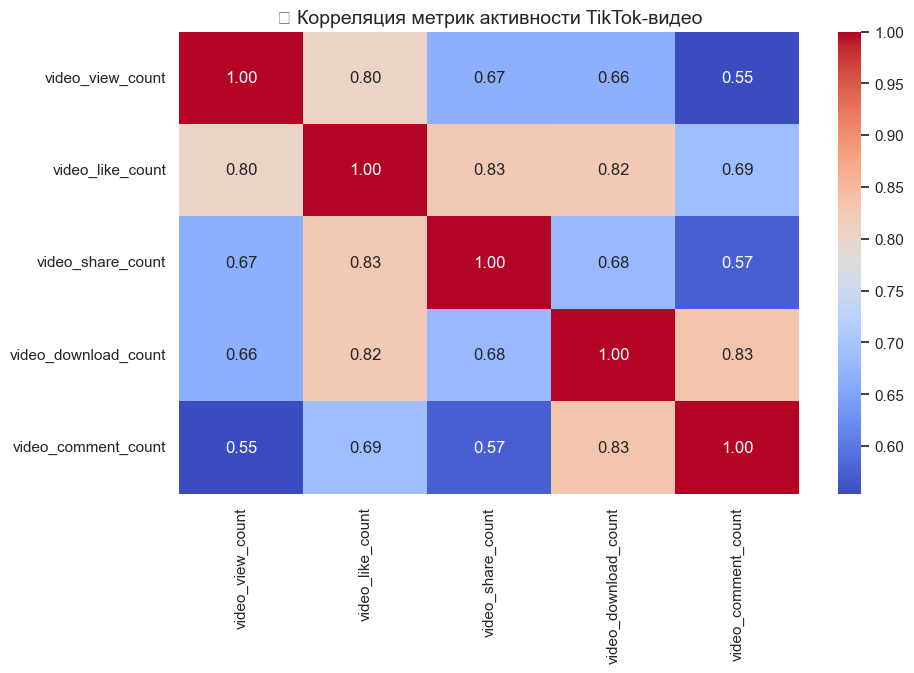

✅ Анализ трендов завершён! Все графики отображены.


In [11]:
# =============================================
# 📊 АНАЛИЗ ТРЕНДОВ TIKTOK (с интерактивными графиками)
# =============================================

# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Настройки отображения
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14

# =============================================
# 🔹 1. Загрузка очищенного датасета
# =============================================
df = pd.read_csv("data/tiktok_dataset_clean.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())

# =============================================
# 🔹 2. Корреляция метрик активности
# =============================================
numeric_cols = [
    "video_view_count", 
    "video_like_count", 
    "video_share_count", 
    "video_download_count", 
    "video_comment_count"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Корреляция метрик активности TikTok-видео")
plt.show()

# =============================================
# 🔹 3. Влияние верификации автора
# =============================================
fig1 = px.box(
    df,
    x="verified_status",
    y="video_view_count",
    color="verified_status",
    title="Просмотры по статусу верификации автора",
    labels={"verified_status": "Статус", "video_view_count": "Просмотры"}
)
fig1.update_layout(showlegend=False)
fig1.show()

# =============================================
# 🔹 4. Связь лайков и просмотров (интерактивно)
# =============================================
fig2 = px.scatter(
    df,
    x="video_view_count",
    y="video_like_count",
    color="verified_status",
    title="Связь между просмотрами и лайками",
    labels={"video_view_count": "Просмотры", "video_like_count": "Лайки"},
    opacity=0.6
)
fig2.show()

# =============================================
# 🔹 5. ТОП-10 видео по лайкам
# =============================================
top10_liked = df.nlargest(10, "video_like_count")[[
    "video_id", "video_like_count", "video_view_count", "verified_status"
]]

fig3 = px.bar(
    top10_liked,
    x="video_id",
    y="video_like_count",
    color="verified_status",
    text="video_like_count",
    title="🔥 ТОП-10 видео по лайкам",
    labels={"video_id": "ID видео", "video_like_count": "Количество лайков"}
)
fig3.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig3.update_layout(xaxis_tickangle=45)
fig3.show()

# =============================================
# 🔹 6. Соотношение лайков к просмотрам
# =============================================
df["like_rate"] = df["video_like_count"] / df["video_view_count"]
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["like_rate"])

fig4 = px.histogram(
    df,
    x="like_rate",
    nbins=40,
    title="Распределение отношения лайков к просмотрам",
    labels={"like_rate": "Like rate (лайки / просмотры)"},
    color_discrete_sequence=["purple"]
)
fig4.show()

# =============================================
# 🔹 7. Интерактивная матрица корреляций
# =============================================
corr = df[numeric_cols].corr().round(2)
fig5 = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale="RdBu",
        text=corr.values,
        texttemplate="%{text}"
    )
)
fig5.update_layout(title="Интерактивная корреляционная матрица")
fig5.show()

print("✅ Анализ трендов завершён! Все графики отображены.")
